In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
# Process to generate price quantity data
# import numpy as np
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)

# # Number of data points
# n_points = 2000

# # Generate random prices between 15 and 1000
# prices = np.random.uniform(15, 1000, n_points)

# # Generate quantities inversely related to prices
# # Using a simple inverse relationship with some noise
# quantities = 24000 / prices + np.random.normal(0, 100, n_points)

# # Ensure quantities are within the specified range
# quantities = np.clip(quantities, 60, 24000)

# # Create a DataFrame
# data = pd.DataFrame({
#     'Price': prices,
#     'Quantity': quantities
# })

# # Save to CSV
# data.to_csv('../data/price_quantity_data.csv', index=False)

# print(data.head())

In [199]:
data = pd.read_csv("../data/price_data1.csv")
data.head()

,Price,Quantity
0,185,120
1,230,850
2,175,300
3,320,200
4,145,1200


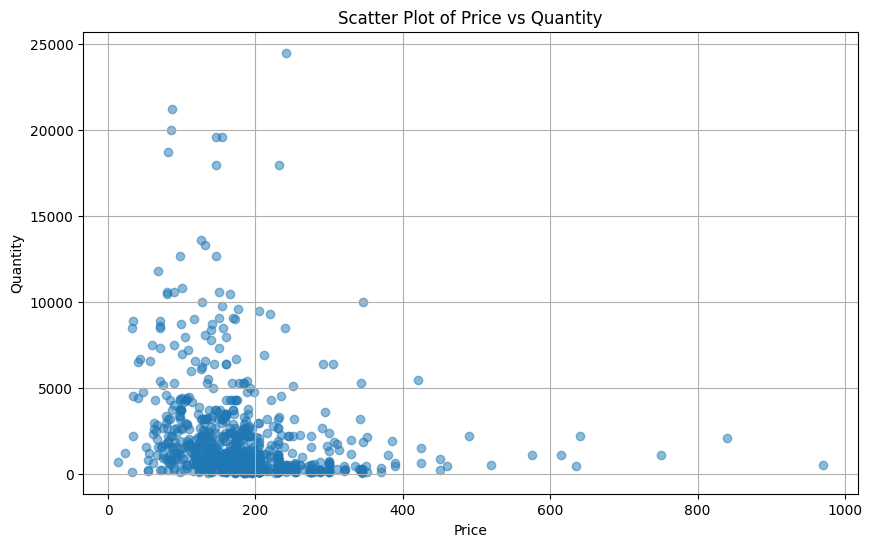

In [200]:
# Scatter plot of price vs quantity
plt.figure(figsize=(10, 6))
plt.scatter(data['Price'], data['Quantity'], alpha=0.5)
plt.title('Scatter Plot of Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [201]:
data.describe()

,Price,Quantity
count,999.000000,999.000000
mean,184.237237,1723.263263
std,80.806126,2680.184535
min,14.000000,80.000000
25%,139.000000,320.000000
50%,179.000000,750.000000
75%,205.000000,2050.000000
max,970.000000,24500.000000


## Linear Price Elasticity model


In [202]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

def fit_linear_model(data, x_col, y_col):
    """
    Fits a linear regression model using OLS and prints the summary.

    Parameters:
    - data: DataFrame containing the data
    - x_col: str, name of the column to be used as the independent variable
    - y_col: str, name of the column to be used as the dependent variable
    """
    x_value = data[x_col]
    y_value = data[y_col]
    X = add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    print(result.summary())
    return result 
    
result = fit_linear_model(data, x_col='Price', y_col='Quantity')

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.22
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.60e-12
Time:                        17:06:03   Log-Likelihood:                -9277.7
No. Observations:                 999   AIC:                         1.856e+04
Df Residuals:                     997   BIC:                         1.857e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3074.0996    206.083     14.917      0.0

In [203]:
mean_price = 179
mean_quantity = 750

In [204]:
result.f_pvalue , result.params

(np.float64(1.5970040460084429e-12),
 const    3074.099634
 Price      -7.332049
 dtype: float64)

In [206]:
# Extract model results
coefficient_pvalue = result.pvalues['Price']  # Use specific p-value for Price coefficient
intercept, slope = result.params

# Calculate linear price elasticity
price_elasticity = round((slope) * (mean_price / mean_quantity), 2)

# Calculate R-squared
r_squared = result.rsquared

print(f'Linear Price Elasticity: {price_elasticity}')
print(f'P-value for Price coefficient: {coefficient_pvalue:.6f}')
print(f'R-squared: {r_squared:.4f}')

# Interpret the results
if abs(coefficient_pvalue) < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

print(f"\nInterpretation:")
print(f"The price elasticity of demand is {price_elasticity}.")
print(f"This relationship is {significance} (p-value: {coefficient_pvalue:.6f}).")
print(f"The model explains {r_squared:.2%} of the variance in the data.")

Linear Price Elasticity: -1.75
P-value for Price coefficient: 0.000000
R-squared: 0.0489

Interpretation:
The price elasticity of demand is -1.75.
This relationship is statistically significant (p-value: 0.000000).
The model explains 4.89% of the variance in the data.


## Non linear Price Elasticity model

In [207]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd

def fit_log_log_model(data, price_col, quantity_col):
    """
    Fits a log-log regression model for price elasticity.
    
    Parameters:
    - data: DataFrame containing the data
    - price_col: str, name of the price column
    - quantity_col: str, name of the quantity column
    
    Returns:
    - result: OLS regression results
    - price_elasticity: calculated price elasticity
    """
    x_value = np.log(data[price_col])
    y_value = np.log(data[quantity_col])
    X = add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    return result, price_elasticity

# Use the function
result, price_elasticity = fit_log_log_model(data, 'Price', 'Quantity')

In [208]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     154.7
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.10e-33
Time:                        17:09:24   Log-Likelihood:                -1537.5
No. Observations:                 999   AIC:                             3079.
Df Residuals:                     997   BIC:                             3089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0860      0.435     27.802      0.000      11.233      12.939
Price         -1.0500      0.084    -12.437      0.000      -1.216      -0.884
==============================================================================
Omnibus:                       14.442   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.534
Skew:                           0.276   Prob(JB):                     0.000698
Kurtosis:                       2.788   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
result.f_pvalue , result.params

(np.float64(4.1009091305915904e-33),
 const    12.085960
 Price    -1.049962
 dtype: float64)

In [210]:
# Calculate price elasticity (slope of the log-log model)
price_elasticity = round(result.params["Price"], 2)

print(f'\nPrice Elasticity: {price_elasticity}')
print(f'P-value: {result.f_pvalue:.6e}')
print(f'R-squared: {result.rsquared:.4f}')

# Interpret the results
if result.f_pvalue < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

print(f"\nInterpretation:")
print(f"The price elasticity of demand is {price_elasticity}.")
print(f"This relationship is {significance} (p-value: {result.f_pvalue:.6e}).")
print(f"The model explains {result.rsquared:.2%} of the variance in the data.")


Price Elasticity: -1.05
P-value: 4.100909e-33
R-squared: 0.1343

Interpretation:
The price elasticity of demand is -1.05.
This relationship is statistically significant (p-value: 4.100909e-33).
The model explains 13.43% of the variance in the data.


In [211]:
# Singe log function
import math

round(math.exp(12.08),0)

176310.0

## Price Optimisation based on elasticity

Optimal Price: $14.00
Maximum Revenue: $154514.96
Optimal Demand: 11037 units


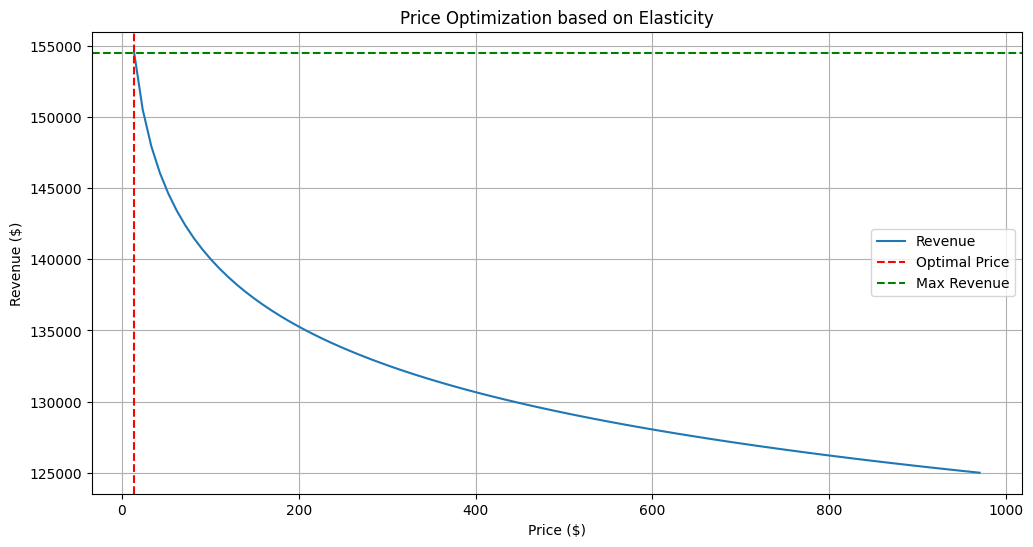

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Set price elasticity (from previous log-log model)
PRICE_ELASTICITY = -1.05

# Set price range (100 points between $15 and $1000)
prices = np.linspace(14, 970, num=100)

# Calculate demand using the constant from the log-log model (exp(7.946530) ≈ 2826)
BASE_DEMAND = 176310
demand = BASE_DEMAND * np.power(prices, PRICE_ELASTICITY)

# Calculate revenue
revenue = prices * demand

# Find optimal price and maximum revenue
max_revenue = np.max(revenue)
optimal_price_index = np.argmax(revenue)
optimal_price = prices[optimal_price_index]
optimal_demand = demand[optimal_price_index]

# Print results
print(f"Optimal Price: ${optimal_price:.2f}")
print(f"Maximum Revenue: ${max_revenue:.2f}")
print(f"Optimal Demand: {optimal_demand:.0f} units")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices, revenue, label='Revenue')
plt.axvline(x=optimal_price, color='r', linestyle='--', label='Optimal Price')
plt.axhline(y=max_revenue, color='g', linestyle='--', label='Max Revenue')
plt.title('Price Optimization based on Elasticity')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

# # Calculate price elasticity at optimal point for verification
# if optimal_price_index == 0:
#     # If optimal price is at the lower bound
#     price_elasticity_at_optimal = PRICE_ELASTICITY * (optimal_price / optimal_demand) * (demand[1] - demand[0]) / (prices[1] - prices[0])
# elif optimal_price_index == len(prices) - 1:
#     # If optimal price is at the upper bound
#     price_elasticity_at_optimal = PRICE_ELASTICITY * (optimal_price / optimal_demand) * (demand[-1] - demand[-2]) / (prices[-1] - prices[-2])
# else:
#     # If optimal price is in the middle
#     price_elasticity_at_optimal = PRICE_ELASTICITY * (optimal_price / optimal_demand) * (demand[optimal_price_index + 1] - demand[optimal_price_index - 1]) / (prices[optimal_price_index + 1] - prices[optimal_price_index - 1])

# print(f"Price Elasticity at Optimal Point: {price_elasticity_at_optimal:.2f}")

In [215]:
data[data["Price"] < 20]

,Price,Quantity
392,14,720


In [217]:
revenue

array([154514.96350482, 150514.85363853, 147960.63026347, 146089.44221001,
       144616.15783247, 143403.09649997, 142373.3181113 , 141479.49883005,
       140690.47660219, 139984.65482616, 139346.45766856, 138764.28679105,
       138229.27624179, 137734.49866413, 137274.43989968, 136844.64005793,
       136441.44157929, 136061.80820317, 135703.19219112, 135363.43516511,
       135040.69285019, 134733.37713159, 134440.11086108, 134159.69219167,
       133891.06613031, 133633.30162555, 133385.57294783, 133147.14443328,
       132917.35788817, 132695.62211665, 132481.40415674, 132274.22190121,
       132073.6378491 , 131879.25378643, 131690.70623524, 131507.66254183,
       131329.81749934, 131156.89041973, 130988.62258524, 130824.77502189,
       130665.12654751, 130509.47205465, 130357.62099534, 130209.39603989,
       130064.63188633, 129923.17420066, 129784.87867106, 129649.61016166,
       129517.24195359, 129387.65506278, 129260.73762527, 129136.38434235,
       129014.49597856, 1

In [218]:
prices

array([ 14.        ,  23.65656566,  33.31313131,  42.96969697,
        52.62626263,  62.28282828,  71.93939394,  81.5959596 ,
        91.25252525, 100.90909091, 110.56565657, 120.22222222,
       129.87878788, 139.53535354, 149.19191919, 158.84848485,
       168.50505051, 178.16161616, 187.81818182, 197.47474747,
       207.13131313, 216.78787879, 226.44444444, 236.1010101 ,
       245.75757576, 255.41414141, 265.07070707, 274.72727273,
       284.38383838, 294.04040404, 303.6969697 , 313.35353535,
       323.01010101, 332.66666667, 342.32323232, 351.97979798,
       361.63636364, 371.29292929, 380.94949495, 390.60606061,
       400.26262626, 409.91919192, 419.57575758, 429.23232323,
       438.88888889, 448.54545455, 458.2020202 , 467.85858586,
       477.51515152, 487.17171717, 496.82828283, 506.48484848,
       516.14141414, 525.7979798 , 535.45454545, 545.11111111,
       554.76767677, 564.42424242, 574.08080808, 583.73737374,
       593.39393939, 603.05050505, 612.70707071, 622.36

## Experiments with different value of elasticity

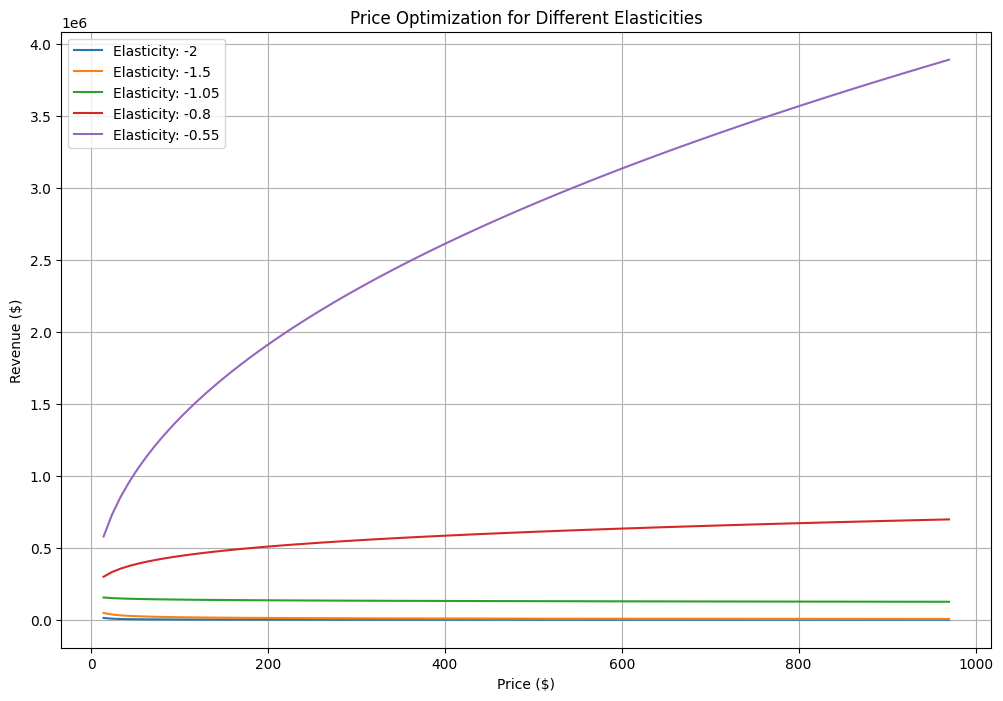

Results:

Elasticity: -2
Optimal Price: $14.00
Maximum Revenue: $12593.57
Optimal Demand: 900 units

Elasticity: -1.5
Optimal Price: $14.00
Maximum Revenue: $47120.83
Optimal Demand: 3366 units

Elasticity: -1.05
Optimal Price: $14.00
Maximum Revenue: $154514.96
Optimal Demand: 11037 units

Elasticity: -0.8
Optimal Price: $970.00
Maximum Revenue: $697639.87
Optimal Demand: 719 units

Elasticity: -0.55
Optimal Price: $970.00
Maximum Revenue: $3893356.98
Optimal Demand: 4014 units

Overall Best Result:
Elasticity: -0.55
Optimal Price: $970.00
Maximum Revenue: $3893356.98
Optimal Demand: 4014 units


In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Set price elasticity values
PRICE_ELASTICITIES = [-2, -1.5, -1.05, -0.8, -0.55]

# Set price range (100 points between $14 and $970)
prices = np.linspace(14, 970, num=100)

# Calculate demand and revenue for each elasticity
BASE_DEMAND = 176310
results = []

plt.figure(figsize=(12, 8))

for elasticity in PRICE_ELASTICITIES:
    demand = BASE_DEMAND * np.power(prices, elasticity)
    revenue = prices * demand
    
    max_revenue = np.max(revenue)
    optimal_price_index = np.argmax(revenue)
    optimal_price = prices[optimal_price_index]
    optimal_demand = demand[optimal_price_index]
    
    results.append({
        'elasticity': elasticity,
        'optimal_price': optimal_price,
        'max_revenue': max_revenue,
        'optimal_demand': optimal_demand
    })
    
    plt.plot(prices, revenue, label=f'Elasticity: {elasticity}')

# Plotting
plt.title('Price Optimization for Different Elasticities')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Results:")
for result in results:
    print(f"\nElasticity: {result['elasticity']}")
    print(f"Optimal Price: ${result['optimal_price']:.2f}")
    print(f"Maximum Revenue: ${result['max_revenue']:.2f}")
    print(f"Optimal Demand: {result['optimal_demand']:.0f} units")

# Find the overall best result
best_result = max(results, key=lambda x: x['max_revenue'])
print("\nOverall Best Result:")
print(f"Elasticity: {best_result['elasticity']}")
print(f"Optimal Price: ${best_result['optimal_price']:.2f}")
print(f"Maximum Revenue: ${best_result['max_revenue']:.2f}")
print(f"Optimal Demand: {best_result['optimal_demand']:.0f} units")